In [65]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from timeit import default_timer as timer
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter
from sklearn.preprocessing import MinMaxScaler
from scipy.ndimage import interpolation as inter

In [62]:
# Importing the data from tensorflow keras data sets.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshaping each image as one array of 784 pixels or we can call as 1-D vectors for both train and test.
x_train=np.reshape(x_train,(60000,784))
x_test=np.reshape(x_test,(10000,784))

### Implementing 1-Nearest Neighbor classifier.

#### Steps involved:-

1. Taking a sample from the dataset where each row is one feature vector for each image. The number of samples taken for training data is 1000 and for test dataset it is 500.


2. Creating an object of KNeighborsClassifier and providing the parameter n_neighbours=1 i.e the number of K.


3. Train and  Fit the classifier using the features and labels from the sampled training data and predict the labels for the test data.  


4. Producing the confusion matrix ( This multi dimension matrix provides the performance of the classifer), and obtaining the accuracy score for model or classifier.


5. presenting the testing error for each of the digit in a table format.

In [8]:
# generate the random indices using numpy for both train and test, 1000 training indices and 500 testing indices are obtained. 
indices_1=np.random.choice(x_train.shape[0],1000,replace=False)
indices_t1=np.random.choice(x_test.shape[0],500,replace=False)
# Obtaining the rows from the obtained respective indices of training and test.
x_1=x_train[indices_1]
y_1=y_train[indices_1]
x_t1=x_test[indices_t1]
y_t1=y_test[indices_t1]
# Creating the KNeighbour classifier and providing n_neighbor as 1 i.e the K=1.
classifier = KNeighborsClassifier(n_neighbors = 1)
y=classifier.fit(x_1, y_1)
y_pred_1 = classifier.predict(x_t1)
# The accuracy is found using unique digits and their respective count from test set and comparing that with confusion matrix 
unique, counts = np.unique(y_t1, return_counts=True)
counts=counts.tolist()
cm = confusion_matrix(y_t1,y_pred_1)
a=cm.diagonal()
acc = accuracy_score(y_t1,y_pred_1)
print("The confusion Matrix is given by: \n",cm)
print('\nPredicted Labels for Test Images: ',y_pred_1)
print('\nAccuracy of Classifier on Test Images: ',acc)
error={}
unique_elements, counts_elements = np.unique(y_t1, return_counts=True)
for i in range(0,len(a)):
    e=[]
    e.append((1-a[i]/counts[i])*100)
    error[i]=e
column=[]
for i in range(0,10):
    column.append('Error in digit'+str(i))    
error=pd.DataFrame(error)
error.columns=column
error=error.T
error.columns=['Error For Digits after 1-NEAREST NEIGHBOR CLASSIFIER']
error

The confusion Matrix is given by: 
 [[52  0  0  0  0  0  1  1  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  2 35  1  1  0  0  1  0  1]
 [ 0  0  1 44  0  3  0  2  1  0]
 [ 0  1  0  0 36  0  0  3  0  7]
 [ 1  1  0  2  0 35  0  0  2  0]
 [ 0  1  0  0  1  0 51  0  0  0]
 [ 0  4  0  0  0  1  0 51  0  3]
 [ 1  1  0  2  2  4  0  1 34  0]
 [ 0  0  0  0  2  0  0  3  1 49]]

Predicted Labels for Test Images:  [2 1 7 4 3 2 1 4 5 7 3 0 6 2 5 3 6 1 8 3 7 8 6 9 4 3 5 1 7 6 2 1 6 1 9 7 0
 5 7 9 1 2 1 4 9 6 0 5 9 8 0 7 0 1 7 4 1 6 9 9 3 7 5 6 7 5 8 7 5 6 7 0 1 3
 5 2 2 1 5 5 4 7 8 9 7 3 8 0 7 5 1 9 9 9 0 0 0 9 3 3 6 5 2 9 6 1 7 6 1 3 7
 0 4 1 2 3 4 8 1 3 6 0 7 9 2 3 6 4 0 4 1 3 0 0 5 2 5 2 4 8 4 0 0 2 2 8 1 9
 8 7 2 7 1 1 1 3 6 7 1 8 0 1 2 0 6 1 8 5 9 3 8 3 6 1 7 3 3 9 3 5 6 1 6 4 1
 9 1 3 5 7 6 6 5 5 3 4 7 1 6 1 9 1 6 4 2 6 9 2 6 9 8 4 0 3 9 7 9 7 1 0 0 6
 9 0 4 9 4 2 5 8 5 4 7 8 1 3 7 4 2 8 3 6 8 0 9 8 3 0 3 5 7 3 9 1 6 1 7 6 9
 2 2 0 9 5 1 1 9 7 1 4 3 1 7 6 4 9 7 7 0 4 1 0 8 7 3 8 6 9 1 4 0 2 4 0 4

,Error For Digits after 1-NEAREST NEIGHBOR CLASSIFIER
Error in digit0,3.703704
Error in digit1,0.000000
Error in digit2,14.634146
Error in digit3,13.725490
Error in digit4,23.404255
Error in digit5,14.634146
Error in digit6,3.773585
Error in digit7,13.559322
Error in digit8,24.444444
Error in digit9,10.909091


In [5]:
# Additional info the classfication report.
print(classification_report(y_t1, y_pred_1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.86      1.00      0.93        56
           2       0.94      0.78      0.85        40
           3       0.85      1.00      0.92        34
           4       0.90      0.85      0.87        61
           5       0.86      0.84      0.85        44
           6       0.95      0.98      0.96        56
           7       0.86      0.85      0.85        65
           8       0.92      0.73      0.81        48
           9       0.71      0.78      0.74        45

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



### Leave one out approach 

A cross validation method i.e the "**The Leave one out approach**" is used to find the best K-value (Number of Neighbors)  

This method will perform the cross validation N times (the number of data points in training set). That means that N separate times, the classifier is trained on all the data except for one point and a prediction is made for that point.
In this case, K ranges from 1 to 20 and the best K value is to be found. 

#### Steps involved:-

1. Create an object of KNeighborsClassifier for values of n_neighbors ranging from 1 to 20.


2. Split the training data in N(in this case 1000) train and test splits where each split will contain 999 training and 1 validation point in rotation.


3. Fit the classifier and predict for every split and get the mean squared error for every K. Choose the K with least MSE and apply it to predict the test data outputs.


In [10]:
error={}
loo = LeaveOneOut()
# Storing the mean sqared erros in the below array.
mean_abs_errors_2=[]
# Testing for k values from 1 to 20.
for i in range(1,21):
    # Creating the classifier for respective K value.
    classifier = KNeighborsClassifier(n_neighbors = i)
    # The below array stores the prediction of validated vector.
    pred_2=[]
    # Leave one-out validation.
    for train_index, test_index in loo.split(x_1):
        x_train_cv, x_test_cv = x_1[train_index], x_1[test_index]
        y_train_cv, y_test_cv = y_1[train_index], y_1[test_index]
        classifier.fit(x_train_cv, y_train_cv)
        pred_2.append(classifier.predict(x_test_cv))
    mean_abs_errors_2.append(mean_squared_error(y_1,pred_2))
print('MSE obtained for K 1 to 20 in a list \n',mean_abs_errors_2)

[2.02, 2.251, 2.311, 2.322, 2.561, 2.498, 2.499, 2.534, 2.736, 2.772, 2.939, 2.935, 2.971, 2.92, 3.069, 3.087, 3.344, 3.245, 3.477, 3.37]


#### Visualizing the mean squared error for all the K values. The line plot below shows K vs MSE obtained from previous cell.

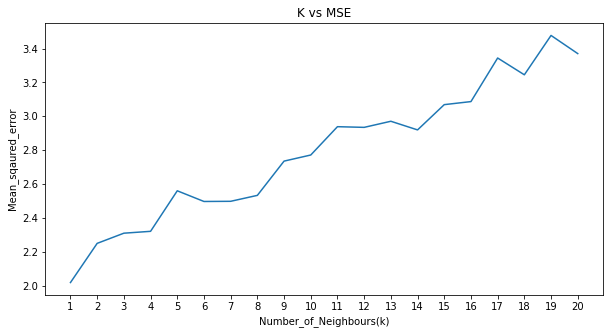

In [16]:
k_values=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.figure(figsize=(10,5))
plt.xlabel('Number_of_Neighbours(k)')
plt.ylabel('Mean_sqaured_error')
plt.title('K vs MSE')
plt.xticks(k_values)
plt.plot(k_values, mean_abs_errors_2)
plt.show()

### Apply the best K to predict.
Steps involved:-
1. Select random indices to obtain training and testing sample as done previously.
2. Using the K value obtained in Leave one out train/fit the KNeighborsClassifier on the training sample.
3. Predict the output labels of the testing sample using the trained classifier.
4. Obtain the testing error with respect to every digit.

In [68]:
# generate the random indices using numpy for both train and test, 1000 training indices and 500 testing indices are obtained.  
indices_2=np.random.choice(x_train.shape[0],1000,replace=False)
indices_t2=np.random.choice(x_test.shape[0],500,replace=False)
x_2=x_train[indices_2]
y_2=y_train[indices_2]
x_t2=x_test[indices_t2]
y_t2=y_test[indices_t2]
# The classifer is created with n_neighbors for which mse was least.
classifier = KNeighborsClassifier(n_neighbors = mean_abs_errors_2.index(min(mean_abs_errors_2))+1)
y_cls_2=classifier.fit(x_2, y_2)
y_pred_2 = classifier.predict(x_t2)
# taking the unique values in test set and the count of numbers.
unique_2, counts_2 = np.unique(y_t2, return_counts=True)
counts_2=counts_2.tolist()
cm_2 = confusion_matrix(y_t2,y_pred_2)
a_2=cm_2.diagonal()
# The accuracy is calculated with respect to test and predicted values.
acc_2 = accuracy_score(y_t2,y_pred_2)
print("The confusion Matrix is given by: \n",cm_2)
print('\nPredicted Labels for Test Images: ',y_pred_2)
print('\nAccuracy of Classifier on Test Images: ',acc_2)
error_2={}
unique_elements_2, counts_elements_2 = np.unique(y_t2, return_counts=True)
# Utilizing the confusion matrix and finding the error values.
for i in range(0,len(a_2)):
    e=[]
    e.append((1-a_2[i]/counts_2[i])*100)
    error_2[i]=e
column=[]
for i in range(0,10):
    column.append('Error in digit'+str(i))
# Creating the Dataframe with erros for each digit calculated using the best K value
error_2=pd.DataFrame(error_2)
error_2.columns=column
error_2=error_2.T
error_2.columns=['Error For Digits after'+str(mean_abs_errors_2.index(min(mean_abs_errors_2))+1) +' NEAREST NEIGHBOR CLASSIFIER']
error_2

The confusion Matrix is given by: 
 [[52  0  1  0  0  0  0  0  0  0]
 [ 0 57  0  0  0  0  1  0  0  0]
 [ 2  3 49  0  0  0  0  0  2  0]
 [ 0  1  0 47  0  0  0  1  0  2]
 [ 0  1  0  0 32  1  0  0  0  1]
 [ 0  1  0  4  1 37  0  0  0  1]
 [ 0  1  0  0  1  1 40  0  0  0]
 [ 0  1  3  0  2  0  0 51  0  1]
 [ 0  1  1  5  1  5  0  1 32  4]
 [ 0  1  0  0  2  1  0  3  0 45]]

Predicted Labels for Test Images:  [7 9 2 8 6 8 6 6 5 3 0 2 4 8 1 7 3 7 0 7 1 2 1 0 0 0 5 7 1 2 3 1 9 6 2 9 4
 2 8 1 6 0 5 0 5 1 8 1 7 6 2 1 9 4 3 2 7 7 5 2 3 1 6 1 9 8 8 4 5 3 3 1 0 9
 9 4 4 5 8 8 7 1 5 5 7 4 2 1 1 0 7 1 7 0 7 2 7 9 6 7 2 7 3 0 2 7 7 9 6 0 6
 7 3 5 8 9 6 3 0 0 2 9 1 1 2 2 9 1 5 7 3 7 9 8 2 4 1 0 4 5 0 0 5 1 5 4 9 7
 1 3 1 6 2 8 5 6 9 6 2 0 6 2 1 1 5 2 3 7 9 1 1 8 3 9 2 4 3 0 8 2 8 4 6 3 4
 5 7 1 6 4 5 6 9 3 9 3 1 7 3 3 7 4 9 0 1 0 7 9 3 0 3 9 6 2 2 0 5 5 8 1 4 1
 4 1 0 5 5 0 5 4 4 5 4 5 2 1 0 1 1 1 5 8 7 8 1 3 7 7 2 2 9 3 8 1 7 8 1 3 2
 0 9 3 1 5 3 1 3 0 4 8 2 3 7 9 1 5 8 9 5 0 2 9 7 6 4 5 7 5 6 1 6 1 9 1 1

,Error For Digits after1 NEAREST NEIGHBOR CLASSIFIER
Error in digit0,1.886792
Error in digit1,1.724138
Error in digit2,12.500000
Error in digit3,7.843137
Error in digit4,8.571429
Error in digit5,15.909091
Error in digit6,6.976744
Error in digit7,12.068966
Error in digit8,36.000000
Error in digit9,13.461538


# Image Downsampler

Image Downsampling is a process of reducing the dimensions of an image and there by improving the speed.

### Steps involved :-

1. With respect to the n for example 4, every 4th sample or feature in 784 dimension feature vector is selected.


2. Then the Leave one out validation is applied, the first step in leave one out validation is creating a classifier and splitting the data.


3. For K in range 1 to 20 the leave one out validation is performed and corresponding mean squared errors are obtained.


4. **Further steps are in next cell**

In [18]:
def image_downsize(n,x,y):
    # The below command pics every nth element in the 784 dimension feature vector.
    x=x[:,n-1::n]
    # Leave one out classifier object is created.
    loo = LeaveOneOut()
    # Splitting the training data.
    loo.get_n_splits(x)
    # An array is created to store the mean squared errors.
    mean_abs_errors=[]
    # K is iterated from 1 to 20.
    for i in range(1,21):
        classifier = KNeighborsClassifier(n_neighbors = i)
        # pred is a list to store a pred in leave one out validation.
        pred=[]
        for train_index, test_index in loo.split(x):
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            classifier.fit(x_train, y_train)
            pred.append(classifier.predict(x_test))
        mean_abs_errors.append(mean_squared_error(y,pred))
    return mean_abs_errors

#### Calling the image downsize function for n=2,4,7,14 and creating the dataframe with errors.

In [19]:
l=[2,4,7,14]
downsize_2={}
for i in l:
    downsize=[]
    downsize_2[i]= image_downsize(i,x_2,y_2)
downsize_2=pd.DataFrame(downsize_2)
#downsize_2

In [21]:
# Creating the DataFrame containing the mean squared error for every n value i.e n=2,4,7,14.
neighbours=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
downsize_2.index=neighbours
col=['Every 2nd Pixel','Every 4th Pixel','Every 7th Pixel','Every 14th Pixel']
downsize_2.index.name='K-Neighbours'
downsize_2.columns=col
downsize_2

,Every 2nd Pixel,Every 4th Pixel,Every 7th Pixel,Every 14th Pixel
K-Neighbours,,,,
1,1.580,2.842,4.450,6.168
2,2.365,3.896,4.867,7.223
3,2.336,3.484,4.879,7.229
4,2.099,3.552,5.528,6.482
5,2.415,3.877,4.926,6.203
6,2.275,3.470,5.270,6.099
7,2.322,3.580,4.916,6.153
8,2.439,3.859,5.110,6.182
9,2.511,3.719,5.011,6.244


#### The Graph representing the Number of Neighbours (k) vs the Mean squared error for every value of n (2,4,7,14)

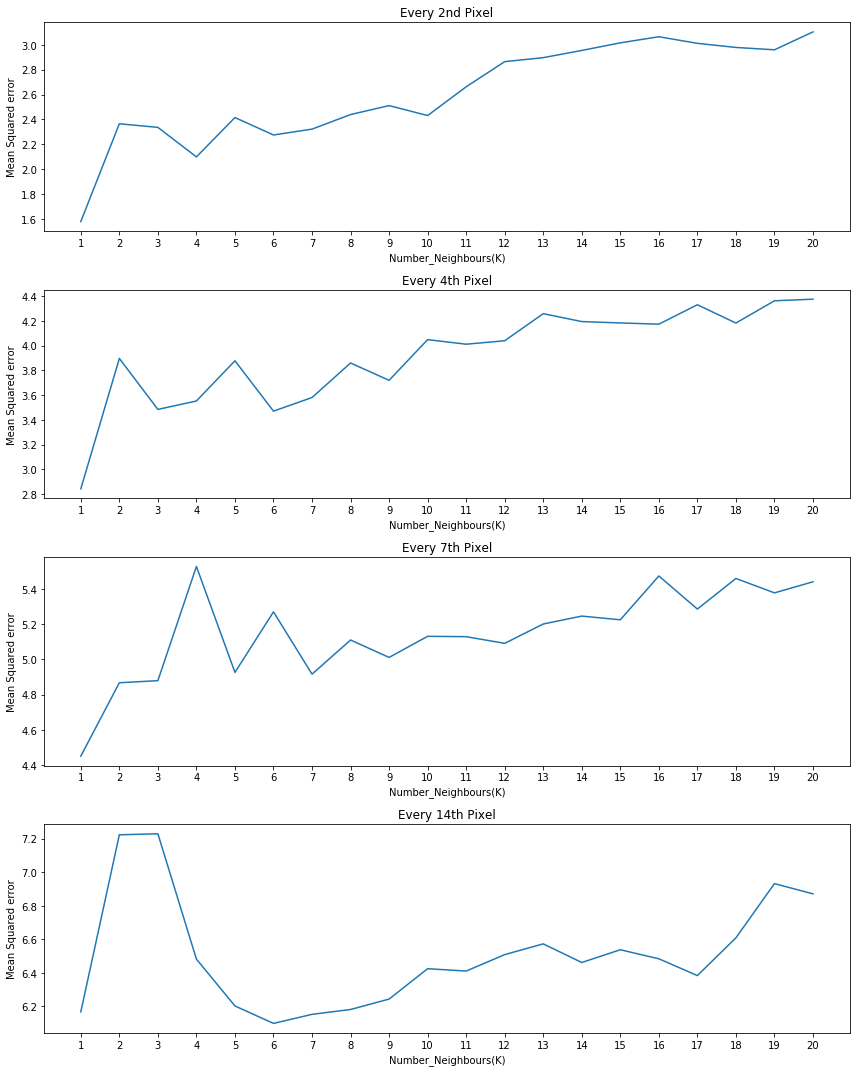

In [23]:
# Four subplots have been created i.e for each value of n (2,4,7,14).
fig,ax = plt.subplots(4,1,figsize=(12,15))
plt.subplots_adjust(hspace=1.5)
for col,ax in zip(downsize_2.columns,ax):
    label='Mean Squared error'
    ax.set(xlabel='Number_Neighbours(K)',ylabel=label,title=col,xticks=neighbours)
    ax.plot(downsize_2.index, downsize_2[col])
plt.tight_layout()
plt.show()

### steps continued :-

5. We pick the least value of K for each n value (2,4,7,14) and the corresponding Mean squared error.


6. **Steps continued in next cell**

In [24]:
# Analysing each column in downsize_2 dataframe and Picking the smallest mean squared error and corresponding k value.
min_mse_values_3=downsize_2.min()
min_corresponding_k=downsize_2.idxmin()
print('The K-neighbour\n',downsize_2.idxmin(),'\n The corresponding MSE\n',downsize_2.min())

The K-neighbour
 Every 2nd Pixel     1
Every 4th Pixel     1
Every 7th Pixel     1
Every 14th Pixel    6
dtype: int64 
 The corresponding MSE
 Every 2nd Pixel     1.580
Every 4th Pixel     2.842
Every 7th Pixel     4.450
Every 14th Pixel    6.099
dtype: float64


### Steps continued :- 

7. Based on the results above the best k value for respective n (2,4,7,14 pixel), the test data is randomly picked and downsampling is applied to test data.


8. K- Neighbor algorithm is applied to test data for obtained k values and Means squared error is obtained based on the predicted values.

In [25]:
# Array to store the Means squared errors.
mean_abs_errors_3=[]
pred_3=[]
train_time_3=[]
test_time_3=[]

x_3=x_train[indices_2]
y_3=y_train[indices_2]
x_t3=x_test[indices_t2]
y_t3=y_test[indices_t2]

# For each value of n with the corresponding k value for the rest data we will perform knn and find the means squared error.
for c,n in zip(min_corresponding_k,[2,4,7,14]):
    x_t_3=x_t3[:,n-1::n]
    x_3_ =x_3[:,n-1::n]
    classifier = KNeighborsClassifier(n_neighbors = c)
    start =timer()
    classifier.fit(x_3_, y_3)
    train_time_3.append(timer()-start)
    start=timer()
    pred_3=classifier.predict(x_t_3)
    test_time_3.append(timer()-start)
    mean_abs_errors_3.append(mean_squared_error(y_t3,pred_3))
print(mean_abs_errors_3)
print(train_time_3)
print(test_time_3)

[2.082, 3.306, 5.25, 7.01]
[0.010348899999826244, 0.004505500000050233, 0.0028047000000697153, 0.001759799999945244]
[0.28411780000033104, 0.13573270000006232, 0.078184500000134, 0.04145070000004125]


In [26]:
# Below is the testing array obtained for corresponding Downsampled values i.e n=(2,4,7,14)
dict = {'Downsampled_Values':[2,4,7,14] , 'Mean_sqared_error': mean_abs_errors_3, 'Training_time': train_time_3, 
        'Testing_time': test_time_3}
test_results_downsample=pd.DataFrame(dict)
test_results_downsample

,Downsampled_Values,Mean_sqared_error,Training_time,Testing_time
0,2,2.082,0.010349,0.284118
1,4,3.306,0.004506,0.135733
2,7,5.250,0.002805,0.078185
3,14,7.010,0.001760,0.041451


**Conclusion** :- As the number of pixel is reduced the Mean square error is increased. The query time for downsampled data has reduced as compared to original data and goes on reducing as we increase the downsampling ratio.

### Binning Downsampling.

The binning downsampling uses windows or bins here nxn square matrices to downsize the pixels.
To perform this the logic is to divide every row of the matrix into n patches.
For example, if the size of the rows is 32 and given n is 4, the row is divided into 32/4 patches. 
further after performing rowwise patching now we take column wise patching.
The whole process can be easily performed by stride_tricks from numpy. 

In [29]:
def mean_bin(a,bin_x,bin_y,y):
    combined_array=[]
    for k in a:
        m,n = np.shape(k.reshape(28,28))
        #using stride_trics of numpy to perform row and column wise patching with respect to the value of n
        strides = k.itemsize*np.array([(m // bin_x) * n, (n // bin_y), n, 1])
        strided_reshape = np.lib.stride_tricks.as_strided(k,shape=(bin_x,bin_y,m//bin_x,n//bin_y),strides=strides)
        x_bin= np.array([np.mean(col) for row in strided_reshape for col in row]).reshape(bin_x,bin_y)
        combined_array.append(x_bin)
    combined_array=np.asarray(combined_array).reshape(a.shape[0],bin_x*bin_x)
    # Incorporating Leave one out validation.
    loo = LeaveOneOut()
    mean_abs_errors_4=[]
    # Iterating for k values from  1 to 20.
    for i in range(1,21):
        classifier_4 = KNeighborsClassifier(n_neighbors = i)
        pred_4=[]
        # The leave one out approach.
        for train_index, test_index in loo.split(combined_array):
            x_train, x_test = combined_array[train_index], combined_array[test_index]
            y_train, y_test = y[train_index], y[test_index]
            classifier_4.fit(x_train, y_train)
            pred_4.append(classifier_4.predict(x_test))
        #Calculating the mean sqaured errors.
        mean_abs_errors_4.append(mean_squared_error(y,pred_4))
    return mean_abs_errors_4

In [30]:
# generate the random indices using numpy for both train and test, 1000 training indices and 500 testing indices are obtained
indices_4=np.random.choice(x_train.shape[0],1000,replace=False)
indices_t4=np.random.choice(x_test.shape[0],500,replace=False)
# Picking the xtrain, xtest, ytrain and ytest with respect to the random indices obtained.
x_4=x_train[indices_4]
y_4=y_train[indices_4]
x_t4=x_test[indices_t4]
y_t4=y_test[indices_t4]
# Iterating for n=2,4,7,14
l=[2,4,7,14]
# Dictionary to store the mean squared error for each value of n 2,4,7,14
downsize_4={}
for i in l:
    downsize_4[i]= mean_bin(x_4,i,i,y_4)
downsize_4=pd.DataFrame(downsize_4)

In [99]:
# Obtaining a dataframe with Kvalue and for each window created i.e n=2,4,7,14.
neighbours=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
downsize_4.index=neighbours
col=['Every 14x14 window','Every 7x7 window','Every 4x4 window','Every 2x2 window']
downsize_4.index.name='K-Neighbours'
downsize_4.columns=col
downsize_4

,Every 14x14 window,Every 7x7 window,Every 4x4 window,Every 2x2 window
K-Neighbours,,,,
1,13.650,7.088,2.373,1.860
2,13.677,6.721,2.501,2.303
3,14.584,6.868,2.451,1.982
4,14.349,6.358,2.398,2.154
5,14.143,6.807,2.524,2.328
6,13.473,6.519,2.616,2.351
7,13.346,6.640,2.762,2.474
8,13.755,6.706,2.603,2.328
9,13.790,6.548,2.778,2.484


**Conclusion** :- Testing errors are least for 2x2 window downsampling i.e for matrix of shape 14X14, as the window size increases the number of pixel decreases the mean squared error increases.

#### Visualizing the K vs the mean absolute error for every window or n i.e for values 2x2,4x4,7x7,14x14 window

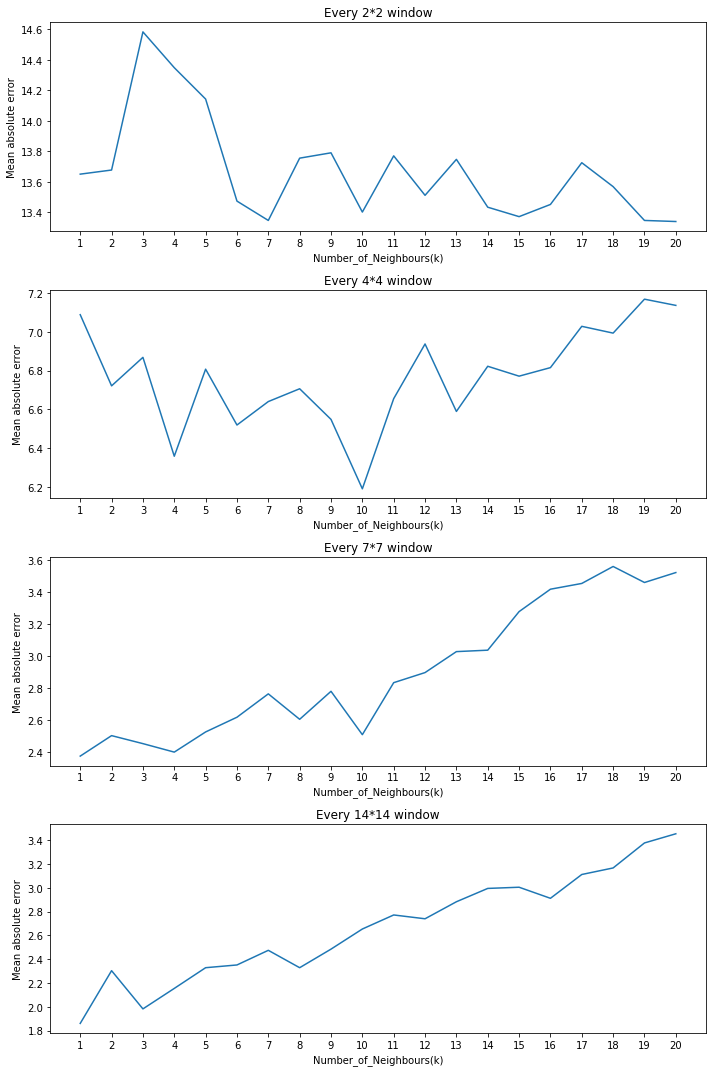

In [32]:
fig,ax = plt.subplots(4,1,figsize=(10,15))
plt.subplots_adjust(hspace=1.5)
for col,ax in zip(downsize_4.columns,ax):
    label='Mean absolute error'
    ax.set(xlabel='Number_of_Neighbours(k)',ylabel=label,title=col,xticks=neighbours)
    ax.plot(downsize_4.index, downsize_4[col])
plt.tight_layout()
plt.show()

In [33]:
# Analysing each column in window dataframe and Picking the smallest mean squared error and corresponding k value.
min_mse_values_4=downsize_4.min()
min_corresponding_k_4=downsize_4.idxmin()
print('The K-neighbour\n',downsize_4.idxmin(),'\n The corresponding MSE\n',downsize_4.min())

The K-neighbour
 Every 2*2 window      20
Every 4*4 window      10
Every 7*7 window       1
Every 14*14 window     1
dtype: int64 
 The corresponding MSE
 Every 2*2 window      13.339
Every 4*4 window       6.190
Every 7*7 window       2.373
Every 14*14 window     1.860
dtype: float64


In [34]:
def mini_mean_bin(a,bin_x,bin_y):
    # An array to store the mean squared error for test data set.
    combined_array=[]
    for k in a:
        m,n = np.shape(k.reshape(28,28))
        # Applying stride_trics of numpy to obtain 1x1 patches.
        strides = k.itemsize*np.array([(m // bin_x) * n, (n // bin_y), n, 1])
        strided_reshape = np.lib.stride_tricks.as_strided(k,shape=(bin_x,bin_y,m//bin_x,n//bin_y),strides=strides)
        x_bin= np.array([np.mean(col) for row in strided_reshape for col in row]).reshape(bin_x,bin_y)
        combined_array.append(x_bin)
    combined_array=np.asarray(combined_array).reshape(a.shape[0],bin_x*bin_x)
    return combined_array

In [35]:
# Applying the best k value obtained after fitting the train data.
mean_abs_errors_4=[]
pred_4=[]
train_time_4=[]
test_time_4=[]


for c,n in zip(min_corresponding_k_4,[2,4,7,14]):
    x_t_4=mini_mean_bin(x_t4,n,n)
    x_4_ =mini_mean_bin(x_4,n,n)
    classifier = KNeighborsClassifier(n_neighbors = c)
    start =timer()
    classifier.fit(x_4_, y_4)
    train_time_4.append(timer()-start)
    start=timer()
    pred_4=classifier.predict(x_t_4)
    test_time_4.append(timer()-start)
    mean_abs_errors_4.append(mean_squared_error(y_t4,pred_4))
print(mean_abs_errors_4)
print(train_time_4)
print(test_time_4)

[13.026, 6.31, 2.164, 2.29]
[0.0005313999999998487, 0.0014420000002246525, 0.0013474000002133835, 0.0048708999997870706]
[0.01173030000018116, 0.017636600000059843, 0.036027999999987514, 0.16904090000025462]


In [36]:
dict_4 = {'Downsampled_Values':['2x2','4x4','7x7','14x14'] , 'Mean_squared_error': mean_abs_errors_4, 'Training_time': train_time_4, 
        'Testing_time': test_time_4}
test_results_window=pd.DataFrame(dict_4)
test_results_window

,Downsampled_Values,Mean_squared_error,Training_time,Testing_time
0,2x2,13.026,0.000531,0.011730
1,4x4,6.310,0.001442,0.017637
2,7x7,2.164,0.001347,0.036028
3,14x14,2.290,0.004871,0.169041


**Conclusion** :- After binning it was found that mean squared error increases as the downsampling increases. The Query time decreases by a huge amount as compared to original data and also when compared to the downsampler applied previously.

### Repeating the same procedure as above for n=1 i.e creating 1x1 pixel and performing the KNN with leave one out validation.

In [37]:
x_5=x_train[indices_4]
y_5=y_train[indices_4]
x_t5=x_test[indices_t4]
y_t5=y_test[indices_t4]
l=[1]
downsize_5={}
for i in l:
    downsize_5[i]= mean_bin(x_5,i,i,y_5)
downsize_5=pd.DataFrame(downsize_5)

In [39]:
neighbours=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
downsize_5.index=neighbours
col=['Every 1 window i.e is 28x28 grids']
downsize_5.index.name='K-Neighbours'
downsize_5.columns=col
downsize_5

,Every 1 window i.e is 28x28 grids
K-Neighbours,
1,17.253
2,16.443
3,16.760
4,17.616
5,18.094
6,17.074
7,16.694
8,17.132
9,17.786


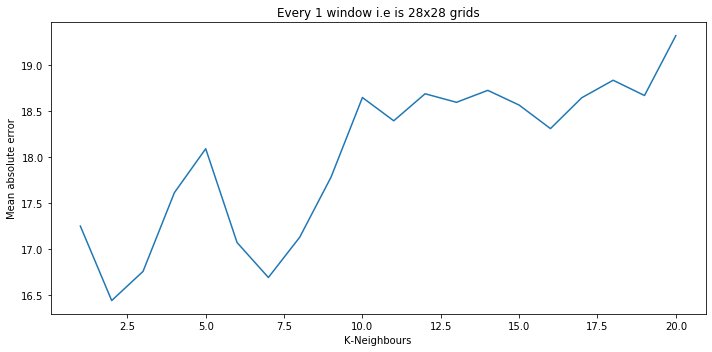

In [43]:
fig,ax = plt.subplots(figsize=(10,5))
plt.subplots_adjust(hspace=1.5)

ax.set(xlabel='K-Neighbours',ylabel=label,title=col[0])
ax.plot(downsize_5.index, downsize_5)
plt.tight_layout()
plt.show()

In [44]:
# Analysing each column in window dataframe and Picking the smallest mean squared error and corresponding k value.
min_mse_values_5=downsize_5.min()
min_corresponding_k_5=downsize_5.idxmin()
print('The K-neighbour\n',downsize_5.idxmin(),'\n The corresponding MSE\n',downsize_5.min())

The K-neighbour
 Every 1 window i.e is 28x28 grids    2
dtype: int64 
 The corresponding MSE
 Every 1 window i.e is 28x28 grids    16.443
dtype: float64


In [45]:
# Since for all Pixel downsample we have k=1 as the best parameter.
mean_abs_errors_5=[]
pred_5=[]
train_time_5=[]
test_time_5=[]


for c,n in zip(min_corresponding_k_5,[1]):
    x_t_5=mini_mean_bin(x_t5,n,n)
    x_5_ =mini_mean_bin(x_5,n,n)
    classifier = KNeighborsClassifier(n_neighbors = c)
    start =timer()
    classifier.fit(x_5_, y_5)
    train_time_5.append(timer()-start)
    start=timer()
    pred_5=classifier.predict(x_t_5)
    test_time_5.append(timer()-start)
    mean_abs_errors_5.append(mean_squared_error(y_t5,pred_5))
print(mean_abs_errors_5)
print(train_time_5)
print(test_time_5)

[15.33]
[0.0004864000002271496]
[0.009836599999744067]


In [46]:
dict_5 = {'Downsampled_Values':['1x1'] , 'Mean_squared_error': mean_abs_errors_5, 'Training_time': train_time_5, 
        'Testing_time': test_time_5}
test_results_window_1=pd.DataFrame(dict_5)
test_results_window_1

,Downsampled_Values,Mean_squared_error,Training_time,Testing_time
0,1x1,15.33,0.000486,0.009837


vi) (30 pts) Do a little research of your own and develop a feature transformation method that you then use with the KNN leave-one-out experiment. Describe your method in detail, using equations and figures as necessary. Someone should be able to reproduce your results with your description. Comment on the testing results and the query time of the classifier.

## Feature Transformation :-

### IEEE Reference :-

1. Handwritten Bangla digit recognition using Sparse Representation Classifier - Haider Adnan Khan ; Abdullah Al Helal ; Khawza I Ahmed



2. Detect & Correct Skew In Images Using Python - Written by Chillar Anand

To perform feature transformation data preprocessing also needs to be performed to improve the performance of the classifier model.
<br>
In this part step by step process performed for preprocessing are shown below for a single image data.

1.**Binarization**: In order to convert the gray scale data into a binary data, the document data is thresholded. 
<br>Global thresholding has been used where only one threshold value for the entire image is picked.(128 in this case)

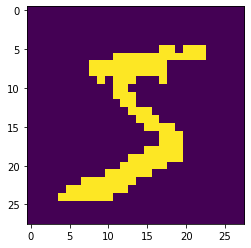

In [70]:
z=x_train[0]
z = (z>128)*255 #threshold 128
plt.imshow(z.reshape(28,28)) 

2.**Noise reduction**: Noise reduction improves the quality of the image.<br> Gaussian filter from scipy.ndimage package is used to achieve the noise reduction which will blur edges and reduce contrast. 

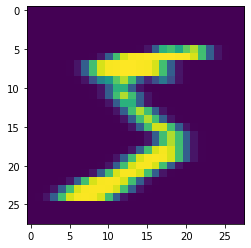

In [71]:
z=gaussian_filter(z,sigma=1)
plt.imshow(z.reshape(28,28))

3.**Normalization**: Normalizing inter-user and intra-user variability due to character size or choice of font family such as boldface is always a good idea. Common normalization steps include stroke width normalization or thinning, and normalization of aspect ratio and size of the Image. To normalize and improve the strokes MinmaxScaler is used.


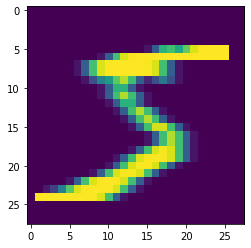

In [72]:
minm = MinMaxScaler()
z=minm.fit_transform(z.reshape(28,28))
plt.imshow(z)

4.**Skew correction**: Skew correction methods are employed in order to align the image document.To perform this a code snippet from the mentioned reference has been used.

In [74]:
def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score

Best angle: -5


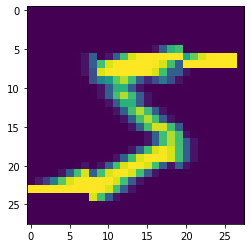

In [75]:
delta = 1
limit = 5
angles = np.arange(-limit, limit+delta, delta)
scores = []
for angle in angles:
    hist, score = find_score(z, angle)
    scores.append(score)

best_score = max(scores)
best_angle = angles[scores.index(best_score)]
print('Best angle: {}'.format(best_angle))
z = inter.rotate(z, best_angle, reshape=False, order=0)
plt.imshow(z)

After Preprocessing the image looks more sharper and clearer with well defined strokes. Next, Applying the PCA dimensional reduction algorithm using the package sklearn.decomposition.

Principal components allows for a large set of variables to be summarized with a smaller number of representative variables that explain most of the variability in the original data

Given a set of p old variables.We can create a set of p new variables, where the new variables are linear combinations of the old. The new variables are ordered by importance and are independent of one another.

So, we can select the best k<p new variables to maintain the most valuable parts of all of the variables.

To find the best n_components the PCA package provides a method to calculate the fraction of variance. Looking at the graph we can confirm a value of k variables/dimensions that we want to generate or are necessary to describe our data/vector.

The selection process for k is shown in one of the cells below and mentioned in bold.

### Algorithm inside PCA:

Take the whole dataset consisting of d+1 dimensions and ignore the labels such that our new dataset becomes d dimensional.


Compute the mean of every dimension of the whole dataset.


Compute the covariance matrix of the whole dataset ( sometimes also called as the variance-covariance matrix)


Compute Eigenvectors and corresponding Eigenvalues


Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d × k dimensional matrix W.


Transform the samples onto the new subspace

## The transformer function below performs all the preprocessing steps which were shown earlier and returns an array.

In [47]:
def transformer(x_tra):
    z=[]
    for a in x_tra:
        p = (a>128)*255
        p = gaussian_filter(p,sigma=1)
        minm = MinMaxScaler()
        p = minm.fit_transform(p.reshape(28,28))
        delta = 1
        limit = 5
        angles = np.arange(-limit, limit+delta, delta)
        scores = []
        for angle in angles:
            hist, score = find_score(p, angle)
            scores.append(score)

        best_score = max(scores)
        best_angle = angles[scores.index(best_score)]
        #print('Best angle: {}'.format(best_angle))
        p = inter.rotate(p, best_angle, reshape=False, order=0)
        z.append(p)
    return np.asarray(z)

In [49]:
indices_6=np.random.choice(x_train.shape[0],1000,replace=False)
X_6 = transformer(x_train[indices_6])
u_train= y_train[indices_6]
indices_t6=np.random.choice(x_test.shape[0],1000,replace=False)
X_t_6 = transformer(x_test[indices_t6])
u_test= y_test[indices_t6]

In [51]:
sdf = pd.DataFrame(X_6.reshape(1000,784))
pca = PCA()
sdf = pca.fit(sdf).transform(sdf)
sdf

array([[ 2.57286745e+00, -3.73520920e+00,  7.14846716e-01, ...,
        -3.18175039e-15, -2.18189824e-16, -5.52713350e-17],
       [ 2.69957143e-01, -3.07025080e+00, -1.62248424e+00, ...,
         6.57918402e-17,  2.12598348e-16,  7.10412819e-16],
       [-1.87710082e+00,  6.27746073e-01, -4.43633597e-02, ...,
        -4.58199972e-17, -2.54070431e-16, -8.25963003e-18],
       ...,
       [-1.93774796e+00, -3.60493817e-01,  1.77539938e+00, ...,
        -2.71222366e-17,  1.84340177e-16,  1.47948730e-17],
       [-3.20317225e+00, -4.32973694e-01,  1.64682655e+00, ...,
        -5.32661887e-17, -3.71597854e-17,  4.34795035e-16],
       [ 2.28862077e+00, -1.92368136e+00,  2.81569836e+00, ...,
         1.42358266e-17,  2.40595857e-16, -1.79243117e-16]])

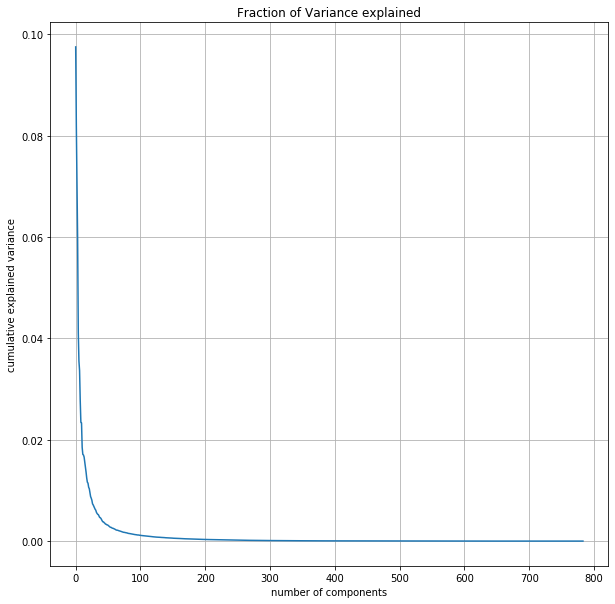

In [52]:
varianceratio = pca.explained_variance_ratio_
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(np.arange(len(varianceratio)),varianceratio)
ax.set_title('Fraction of Variance explained')
ax.set_xlabel('number of components')
ax.set_ylabel('cumulative explained variance');
ax.grid()

In [53]:
sdf = pd.DataFrame(X_6.reshape(1000,784))
pca = PCA(n_components=80)
sdf = pca.fit(sdf).transform(sdf)
sdf

array([[ 2.57286745, -3.7352092 ,  0.71484672, ..., -0.33728453,
        -0.04881565, -0.33311034],
       [ 0.26995714, -3.0702508 , -1.62248424, ...,  0.35781863,
        -0.15797426, -0.25691035],
       [-1.87710082,  0.62774607, -0.04436336, ..., -0.07026497,
         0.25809671, -0.00786646],
       ...,
       [-1.93774796, -0.36049382,  1.77539938, ..., -0.15031148,
        -0.20962213,  0.59855463],
       [-3.20317225, -0.43297369,  1.64682655, ..., -0.38674188,
        -0.15658258,  0.33116325],
       [ 2.28862077, -1.92368136,  2.81569836, ...,  0.11570476,
         0.23487014,  0.33980679]])

In [54]:
error_6={}
mean_abs_errors_6=[]
for i in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors = i)
    pred_6=[]
    for train_index, test_index in loo.split(sdf):
        x_train, x_test = sdf[train_index], sdf[test_index]
        y_train, y_test = u_train[train_index], u_train[test_index]
        classifier.fit(x_train, y_train)
        pred_6.append(classifier.predict(x_test))
    mean_abs_errors_6.append(mean_squared_error(u_train,pred_6))
print(mean_abs_errors_6)

[2.026, 2.122, 2.144, 1.921, 2.121, 2.21, 2.253, 2.101, 2.282, 2.416, 2.378, 2.673, 2.641, 2.558, 2.665, 2.805, 2.78, 2.918, 2.934, 2.937]


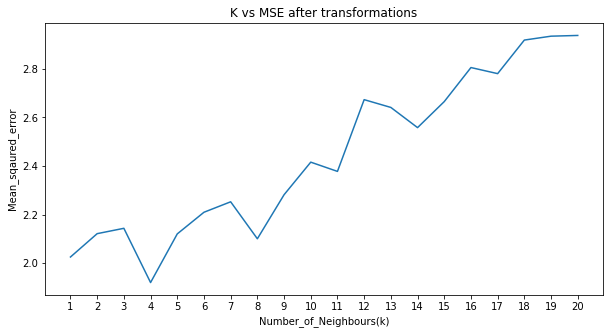

In [55]:
k_values=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.figure(figsize=(10,5))
plt.xlabel('Number_of_Neighbours(k)')
plt.ylabel('Mean_sqaured_error')
plt.title('K vs MSE after transformations')
plt.xticks(k_values)
plt.plot(k_values, mean_abs_errors_6)
plt.show()

In [58]:
# Analysing each column in downsize_2 dataframe and Picking the smallest mean squared error and corresponding k value.
min_mse_values_6=min(mean_abs_errors_6)
min_corresponding_k_6= mean_abs_errors_6.index(min_mse_values_6)
print('The K-neighbour\n',min_corresponding_k_6,'\n The corresponding MSE\n',min_mse_values_6)

The K-neighbour
 3 
 The corresponding MSE
 1.921


In [97]:
x_6a=x_train[indices_1]
y_6a=y_train[indices_1]
x_t6a=x_test[indices_t1]
y_t6a=y_test[indices_t1]
x_6a = pd.DataFrame(x_6a)
pca = PCA(n_components=80)
x_6a = pca.fit(x_6a).transform(x_6a)
x_t6a = pca.transform(x_t6a)
classifier = KNeighborsClassifier(n_neighbors = 3)
y_cls_6a=classifier.fit(x_6a, y_6a)
y_pred_6a = classifier.predict(x_t6a)
unique_6a, counts_6a = np.unique(y_t6a, return_counts=True)
counts_6a=counts_6a.tolist()
cm_6a = confusion_matrix(y_t6a,y_pred_6a)
a_6a=cm_6a.diagonal()
acc_6a = accuracy_score(y_t6a,y_pred_6a)
print("The confusion Matrix is given by: \n",cm_6a)
print('\nPredicted Labels for Test Images: ',y_pred_6a)
print('\nAccuracy of Classifier on Test Images: ',acc_6a)
error_6a={}
unique_elements_6a, counts_elements_6a = np.unique(y_t6a, return_counts=True)
for i in range(0,len(a_6a)):
    e=[]
    e.append((1-a_6a[i]/counts_6a[i])*100)
    error_6a[i]=e
column=[]
for i in range(0,10):
    column.append('Error in digit'+str(i))    
error_6a=pd.DataFrame(error_6a)
error_6a.columns=column
error_6a=error_6a.T
error_6a.columns=['Error For Digits after Transformation']
error_6a

The confusion Matrix is given by: 
 [[52  0  0  0  0  0  1  1  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 1  2 36  0  0  0  0  1  0  1]
 [ 0  0  1 47  0  2  0  1  0  0]
 [ 0  1  0  0 38  0  0  0  0  8]
 [ 1  1  1  2  0 35  0  0  1  0]
 [ 0  1  0  0  0  0 52  0  0  0]
 [ 0  4  1  0  1  0  0 52  0  1]
 [ 2  1  1  2  1  5  0  1 31  1]
 [ 1  0  1  0  3  0  0  2  0 48]]

Predicted Labels for Test Images:  [2 1 7 4 3 2 1 4 5 7 3 0 6 2 8 3 6 1 8 3 7 8 6 9 9 3 5 1 7 6 2 1 6 1 9 7 0
 5 7 9 1 1 1 4 9 6 0 5 4 8 0 7 0 1 7 4 1 6 4 9 3 7 5 6 4 5 8 7 5 6 7 0 1 3
 5 2 2 1 8 5 4 7 8 9 7 3 8 0 7 5 1 9 9 9 0 0 0 9 0 3 6 5 2 9 6 1 7 6 2 3 7
 0 4 1 2 3 9 8 1 3 6 0 7 9 2 3 6 9 0 2 1 3 0 0 5 2 5 2 4 8 4 0 0 2 2 2 1 9
 8 7 2 4 1 1 1 3 6 7 1 8 0 1 2 0 6 1 8 5 9 3 8 3 6 1 7 3 3 9 3 5 6 1 6 4 1
 9 1 3 5 4 6 6 5 2 3 4 7 1 6 1 9 1 6 4 2 6 2 3 6 9 5 4 0 3 9 7 9 7 1 0 0 6
 9 0 4 9 4 2 5 8 5 4 7 8 1 3 7 4 2 8 3 6 0 0 9 8 3 0 3 5 7 3 9 1 6 1 2 6 4
 2 2 0 9 5 1 1 9 7 1 4 3 1 7 6 4 9 7 3 0 4 1 0 8 7 3 8 6 9 1 2 0 2 6 0 4

,Error For Digits after Transformation
Error in digit0,3.703704
Error in digit1,0.000000
Error in digit2,12.195122
Error in digit3,7.843137
Error in digit4,19.148936
Error in digit5,14.634146
Error in digit6,1.886792
Error in digit7,11.864407
Error in digit8,31.111111
Error in digit9,12.727273


**Conclusion**: Comparing the results obtained before the transformation i.e after 1 and 2nd question we can see the below points:-

1. The Accuracy score of the classifier in the first part of the project is 87% and whereas after the feature transformation applied the accuracy of the classifier is 89%.

2. The mean squared error has also been marginally improved and for digit 6 we observe there is a lot of difference


**MSE before transformation for digit 6 :- 3.8
MSE after transformation for digit  6: - 1.8
It is almost more than 50% reduction in the mean squared error** 